In [84]:
!pip install datasketch

In [85]:
import pandas as pd
import numpy as np

metadata = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')

<ipython-input-85-fd40d8434a22>:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')


In [86]:
import pandas as pd
import numpy as np
import re

required_columns = ['id', 'genres', 'overview', 'budget', 'production_companies', 'vote_average', 'vote_count', 'title']

metadata = metadata[required_columns]

metadata['overview'] = metadata['overview'].fillna('')

metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')
metadata = metadata[metadata['budget'] > 0]

metadata['vote_average'] = metadata['vote_average'].fillna(0)
metadata['vote_count'] = metadata['vote_count'].fillna(0)

metadata['title'] = metadata['title'].fillna('')

# 제작사 이름 추출 함수
def extract_names_from_production_companies(value):
    if pd.isna(value):
        return []
    names = re.findall(r"'name': '([^']+)'", value)
    return names

metadata['production_companies'] = metadata['production_companies'].apply(extract_names_from_production_companies)

print(metadata.head())
print(f"Remaining rows: {metadata.shape[0]}")


      id                                             genres  \
0    862  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1   8844  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
3  31357  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
5    949  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
6  11860  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   

                                            overview      budget  \
0  Led by Woody, Andy's toys live happily in his ...  30000000.0   
1  When siblings Judy and Peter discover an encha...  65000000.0   
3  Cheated on, mistreated and stepped on, the wom...  16000000.0   
5  Obsessive master thief, Neil McCauley leads a ...  60000000.0   
6  An ugly duckling having undergone a remarkable...  58000000.0   

                                production_companies  vote_average  \
0                          [Pixar Animation Studios]           7.7   
1  [TriStar Pictures, Teitler Film, Interscope Co...           6.9   
3 

<ipython-input-86-9a7be4ca5338>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['overview'] = metadata['overview'].fillna('')
<ipython-input-86-9a7be4ca5338>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['budget'] = pd.to_numeric(metadata['budget'], errors='coerce')


In [87]:
import ast

def extract_genre_ids(value):
    try:
        if pd.isna(value):
            return []
        parsed = ast.literal_eval(value)
        return [d['id'] for d in parsed if isinstance(d, dict) and 'id' in d]
    except (ValueError, SyntaxError):
        return []

metadata['genres'] = metadata['genres'].apply(extract_genre_ids)

In [88]:
metadata = metadata[~metadata['id'].duplicated(keep='first')]

In [89]:
print(metadata.head())
print(f"Remaining rows: {metadata.shape[0]}")

      id            genres                                           overview  \
0    862   [16, 35, 10751]  Led by Woody, Andy's toys live happily in his ...   
1   8844   [12, 14, 10751]  When siblings Judy and Peter discover an encha...   
3  31357   [35, 18, 10749]  Cheated on, mistreated and stepped on, the wom...   
5    949  [28, 80, 18, 53]  Obsessive master thief, Neil McCauley leads a ...   
6  11860       [35, 10749]  An ugly duckling having undergone a remarkable...   

       budget                               production_companies  \
0  30000000.0                          [Pixar Animation Studios]   
1  65000000.0  [TriStar Pictures, Teitler Film, Interscope Co...   
3  16000000.0           [Twentieth Century Fox Film Corporation]   
5  60000000.0  [Regency Enterprises, Forward Pass, Warner Bros.]   
6  58000000.0  [Paramount Pictures, Scott Rudin Productions, ...   

   vote_average  vote_count              title  
0           7.7      5415.0          Toy Story  
1     

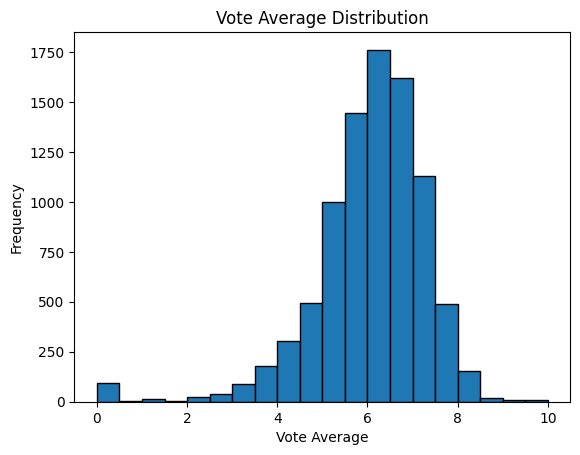

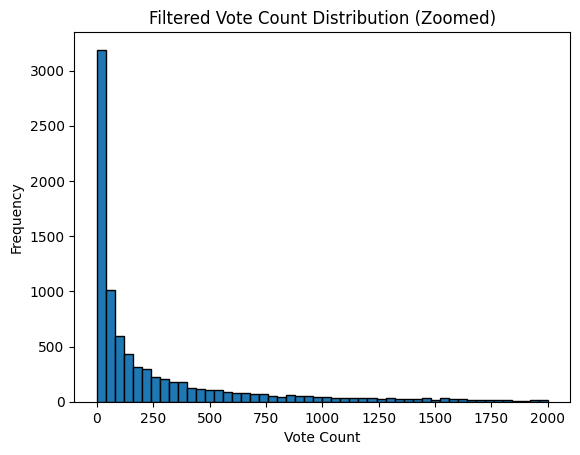

Vote Average Mean: 6.013389639639639
Vote Average Variance: 1.5576932055239092


In [90]:
import matplotlib.pyplot as plt

plt.hist(metadata['vote_average'], bins=20, edgecolor='k')
plt.title('Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

plt.hist(metadata['vote_count'], bins=50, edgecolor='k', range=(0, 2000))
plt.title('Filtered Vote Count Distribution (Zoomed)')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

vote_average_mean = metadata['vote_average'].mean()
vote_average_variance = metadata['vote_average'].var()
print(f"Vote Average Mean: {vote_average_mean}")
print(f"Vote Average Variance: {vote_average_variance}")

In [91]:
vote_average_threshold = metadata['vote_average'].quantile(0.75)
metadata = metadata[metadata['vote_average'] >= vote_average_threshold]

vote_count_threshold = metadata['vote_count'].quantile(0.75)
metadata = metadata[metadata['vote_count'] >= vote_count_threshold]

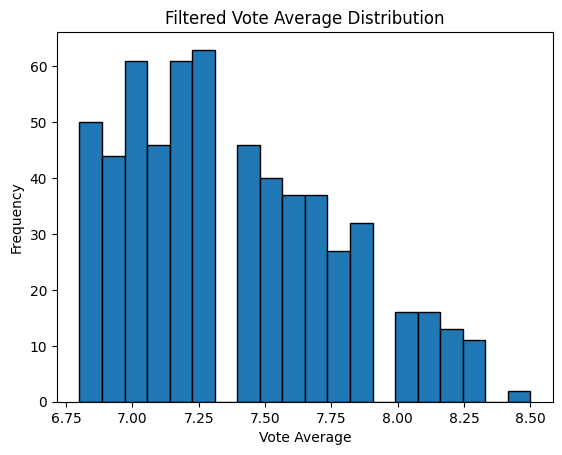

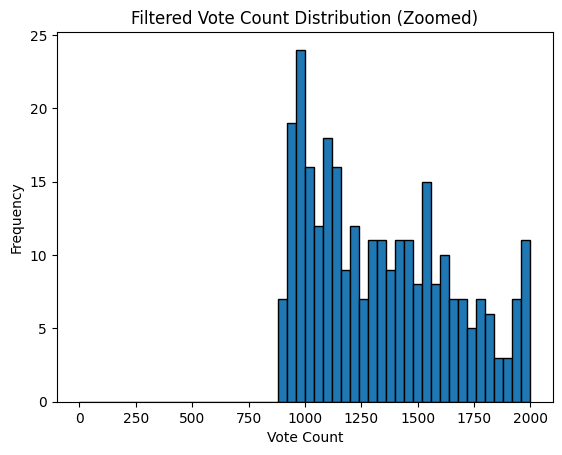

Vote Average Mean: 7.373255813953488
Vote Average Variance: 0.16026525558178226


In [92]:
plt.hist(metadata['vote_average'], bins=20, edgecolor='k')
plt.title('Filtered Vote Average Distribution')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

plt.hist(metadata['vote_count'], bins=50, edgecolor='k', range=(0, 2000))
plt.title('Filtered Vote Count Distribution (Zoomed)')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

vote_average_mean = metadata['vote_average'].mean()
vote_average_variance = metadata['vote_average'].var()
print(f"Vote Average Mean: {vote_average_mean}")
print(f"Vote Average Variance: {vote_average_variance}")

In [93]:
import pandas as pd
metadata.to_csv('/content/drive/MyDrive/filtered_data.csv', index=False)

In [94]:
filtered_data = pd.read_csv('/content/drive/MyDrive/filtered_data.csv')

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from datasketch import MinHash, MinHashLSH
import numpy as np

mlb_genres = MultiLabelBinarizer()
genres_one_hot = pd.DataFrame(
    mlb_genres.fit_transform(filtered_data['genres']),
    columns=[f"genre_{cls}" for cls in mlb_genres.classes_]
)

filtered_data['production_companies'] = filtered_data['production_companies'].apply(
    lambda x: x if isinstance(x, list) else []
)
mlb_companies = MultiLabelBinarizer()
companies_one_hot = pd.DataFrame(
    mlb_companies.fit_transform(filtered_data['production_companies']),
    columns=[f"company_{cls}" for cls in mlb_companies.classes_]
)

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
overview_vectors = pd.DataFrame(tfidf.fit_transform(filtered_data['overview']).toarray())

scaler = MinMaxScaler()
numerical_features = filtered_data[['budget','vote_average', 'vote_count']]
numerical_features_scaled = pd.DataFrame(scaler.fit_transform(numerical_features), columns=numerical_features.columns)

final_vectors = pd.concat([genres_one_hot, companies_one_hot, overview_vectors, numerical_features_scaled], axis=1).values

lsh = MinHashLSH(threshold=0.3, num_perm=128)
movie_ids = filtered_data['id'].values

for idx, vector in enumerate(final_vectors):
    m = MinHash(num_perm=128)
    for value in vector:
        m.update(str(value).encode('utf8'))
    lsh.insert(str(movie_ids[idx]), m)

query_index = 0
query_vector = final_vectors[query_index]

m_query = MinHash(num_perm=128)
for value in query_vector:
    m_query.update(str(value).encode('utf8'))

similar_movies = lsh.query(m_query)
print(f"Movies similar to ID {movie_ids[query_index]}: {similar_movies}")

similar_movie_ids = list(map(int, similar_movies))
similar_movie_rows = filtered_data[filtered_data['id'].isin(similar_movie_ids)][['id', 'title']]
similar_movie_rows = similar_movie_rows.reset_index(drop=True)
print(similar_movie_rows)

Movies similar to ID 862: ['938', '82695', '862', '114', '64690', '70', '329', '271110', '12092', '51828', '96721', '510', '321697', '72570', '2164', '1018', '12230']
        id                            title
0      862                        Toy Story
1     2164                         Stargate
2      329                    Jurassic Park
3      114                     Pretty Woman
4    12092              Alice in Wonderland
5      510  One Flew Over the Cuckoo's Nest
6    12230   One Hundred and One Dalmatians
7      938           For a Few Dollars More
8     1018                 Mulholland Drive
9       70              Million Dollar Baby
10   64690                            Drive
11   51828                          One Day
12   72570                          The Vow
13   82695                   Les Misérables
14   96721                             Rush
15  271110       Captain America: Civil War
16  321697                       Steve Jobs
